**Image Path:** `C:\Users\santh\OneDrive\Pictures\Screenshots\Firefly\Screenshot (375).png`

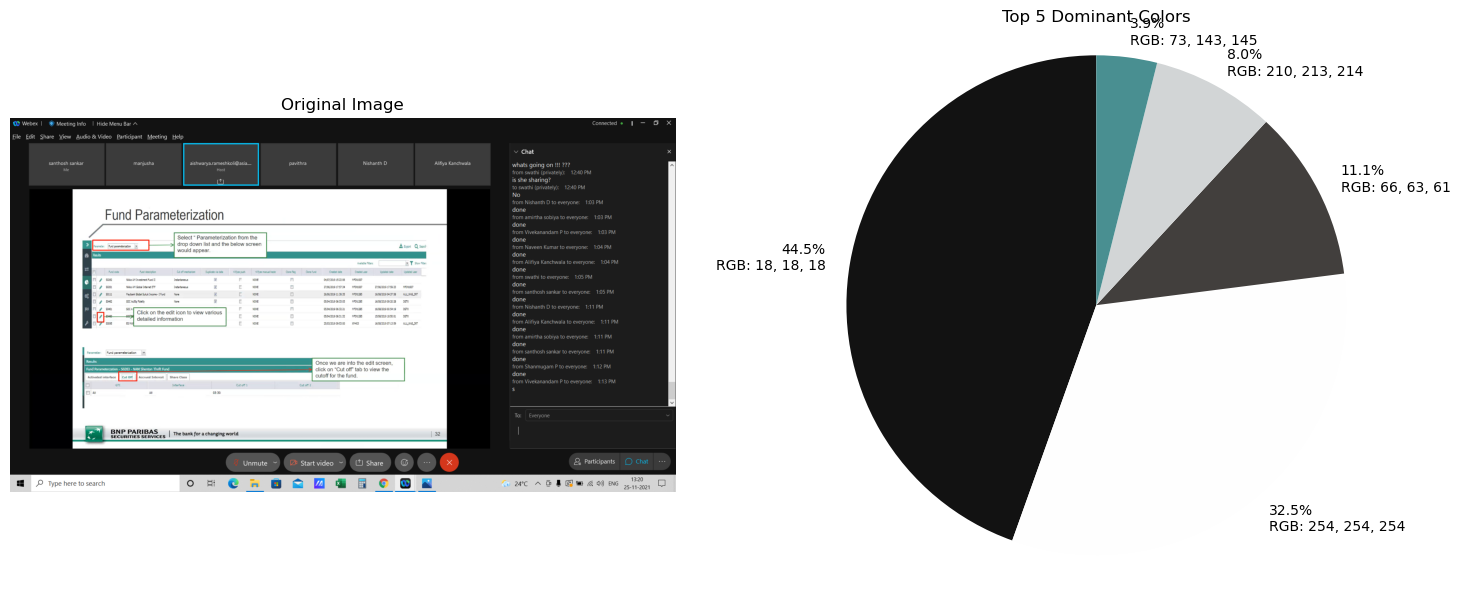

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import os

# Function to display image path
def display_image_path(path):
    display(Markdown(f"**Image Path:** `{path}`"))

# Function to get dominant colors
def get_dominant_colors(image, num_colors=5):
    # Convert image from BGR to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Reshape the image to be a list of pixels
    pixels = image_rgb.reshape(-1, 3)
    
    # Convert to float32 for k-means
    pixels = np.float32(pixels)
    
    # Define criteria and apply k-means
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, 0.2)
    _, labels, centers = cv2.kmeans(pixels, num_colors, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to 8 bit values
    centers = np.uint8(centers)
    
    # Get the percentage of each dominant color
    unique, counts = np.unique(labels, return_counts=True)
    percentages = counts / counts.sum()
    
    # Sort colors by percentage (descending)
    sorted_indices = np.argsort(percentages)[::-1]
    dominant_colors = centers[sorted_indices]
    dominant_percentages = percentages[sorted_indices]
    
    return dominant_colors, dominant_percentages

# Function to display results
def display_results(image_path, num_colors=5):
    # Display image path
    display_image_path(image_path)
    
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return
    
    # Get dominant colors
    colors, percentages = get_dominant_colors(image, num_colors)
    
    # Create figure
    plt.figure(figsize=(15, 6))
    
    # Show original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    # Show pie chart
    plt.subplot(1, 2, 2)
    
    # Create labels with RGB values and percentages
    labels = []
    for i, (color, percent) in enumerate(zip(colors, percentages)):
        rgb = f"RGB: {color[0]}, {color[1]}, {color[2]}"
        percentage = f"{percent*100:.1f}%"
        labels.append(f"{percentage}\n{rgb}")
    
    # Create pie chart
    plt.pie(percentages, labels=labels, colors=colors/255, startangle=90)
    plt.title(f'Top {num_colors} Dominant Colors')
    plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
    
    plt.tight_layout()
    plt.show()

# Your image path
image_path = r"C:\Users\santh\OneDrive\Pictures\Screenshots\Firefly\Screenshot (375).png"

# Verify path exists
if not os.path.exists(image_path):
    print(f"Error: Image file not found at {image_path}")
else:
    # Display analysis with 5 dominant colors (you can change this number)
    display_results(image_path, num_colors=5)